In [586]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
sns.set(rc={'figure.figsize':(20,6)},color_codes=True)

# Step 1: create dataset to be clustered

In [5]:
from sklearn.datasets.samples_generator import make_blobs

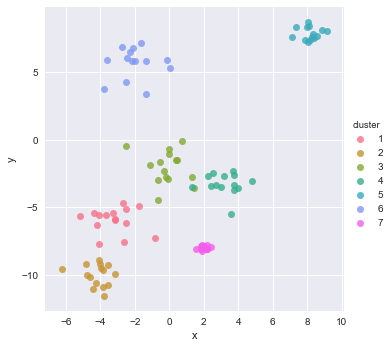

In [587]:
centers =[
    [-3,-6],
    [-4,-10],
    [0,-2],
    [3,-3],
    [8,8],
    [-2,6],
    [2,-8]
]

cluster_std = [
    1,
    1,
    1,
    1,
    0.5,
    1,
    0.2
]

X,c = make_blobs(n_features=2,n_samples=101,centers=centers,cluster_std=cluster_std,random_state=2018)

X = pd.DataFrame(X,columns=['x','y'])
X['cluster']=c+1

sns.lmplot(data=X,x='x',y='y',fit_reg=False,hue='cluster');

## DBscan

### Parameters

In [565]:
r = 2 # Radius of tolerance
N = 5 # Number of neighbors

### Pairwise distance

In [566]:
M = X.shape[0]
m = np.ceil(M/2).astype(int)

x = X.drop('cluster',axis=1)

D = np.zeros([M,M])

for i,p1 in x.iterrows():
    for j,p2 in x.iloc[i+1:].iterrows():
        D[i,j] = np.linalg.norm(p1-p2)
        
D = pd.DataFrame(D + D.T).round(2)

### Distance within radius?

93


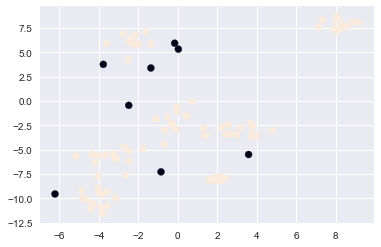

In [577]:
core = (D<r).sum(axis=0)>N

print(core.sum())
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=core);

In [724]:
X['cluster_number'] = 0
d = D.loc[core,core]
K = 0

for _ in range(10):
    cores = set(d.index.values)
    while cores:
        current_core = np.random.choice(list(cores))
        neighbors = d[(d[current_core]<r)].index
        temp = X.loc[neighbors,'cluster_number'].min()
        if temp>0:
            current_clust = temp
        else:
            K+=1
            current_clust = K

        X.loc[neighbors,'cluster_number'] = current_clust
        cores = cores-set(neighbors.values)

In [743]:
v = X['cluster_number'].unique()
renamer = dict(zip(sorted(v),range(len(v))))
renamer

{0: 0, 1: 1, 2: 2, 6: 3, 7: 4}

In [754]:
X['cluster_number'] = X['cluster_number'].apply(lambda s:renamer[s])

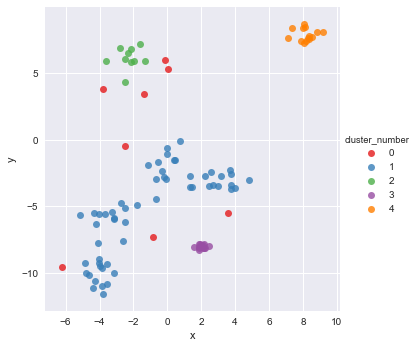

In [755]:
sns.lmplot(data=X,x='x',y='y',fit_reg=False,hue='cluster_number',palette="Set1");